In [1]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Neural Network Training on CSV v1 file features

In [2]:
dataset_file = "datasets/data-v1.csv"

df = pd.read_csv(dataset_file, sep=",")
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.380795,0.124698,1883.001208,1865.303842,3878.803772,0.101184,-162.754063,121.255273,-29.199931,54.109434,...,-7.320438,3.900521,-2.205811,-2.243190,1.619559,-5.134632,3.043665,-6.634297,5.002622,-7.852236
std,0.082699,0.062342,522.242739,339.144108,1096.400581,0.039370,95.151859,23.111192,20.168244,16.110998,...,5.512331,5.395750,4.365042,3.977097,3.694564,3.984223,4.333503,4.096735,4.316616,4.287511
min,0.171805,0.005014,549.065530,796.514455,710.220705,0.021877,-556.024780,42.361320,-99.755829,-3.247742,...,-32.414146,-14.018186,-20.763159,-16.360909,-12.323302,-19.637094,-12.697938,-18.963448,-13.177314,-22.937521
25%,0.321059,0.082679,1461.113254,1643.098517,3034.883732,0.071043,-213.648769,104.958897,-42.612360,45.396466,...,-11.082822,0.603397,-5.172873,-4.874094,-0.737182,-7.606263,0.300295,-9.524103,2.242899,-10.705755
50%,0.385390,0.116670,1926.222388,1943.105990,4064.821254,0.097405,-138.674522,118.840340,-30.713336,54.597818,...,-7.538498,4.457320,-2.305679,-2.279468,1.757869,-5.469918,3.286095,-6.899161,5.105744,-8.184787
75%,0.439446,0.167502,2277.180673,2110.350537,4748.075456,0.128231,-95.242519,135.433762,-17.951447,64.680765,...,-3.929274,7.729157,0.444397,0.385467,4.065663,-2.710800,5.842021,-4.012571,8.109790,-5.197460
max,0.667248,0.378549,3369.517356,2611.325445,6268.003765,0.257681,15.127309,197.522858,55.721581,98.046173,...,11.871216,17.391365,13.880814,10.114944,17.297344,9.187266,22.280184,11.137421,22.338120,10.675509


#### Project questions

**Q.8 What are the features types (numeric/textual/visual)?**

The dataset doesn't contain any null/nan values and every feature is quantitive continuous (except filename and label which are strings).

In [3]:
from sklearn import preprocessing

X = df.drop(["label", "filename"], axis=1).values

std_scale = preprocessing.StandardScaler().fit(X) # applying feature scaling because PCA uses euclidean distance to ocompute clusters

X = std_scale.transform(X)

y = df["label"].values

### Traininig a simple Neural network

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y_encoded = encoder.transform(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(600, activation="relu"),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", # because classes are exclusive or else we would use  categorical_crossentropy
             optimizer=SGD(learning_rate=0.01), # Stochastic Gradient Descent, will use backpropoagation (reverse mode autodiff + Gradient Descent
             metrics=["accuracy"],)

model.summary()

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               16200     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 227,610
Trainable params: 227,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 2.2939 - accuracy: 0.0730 - val_loss: 2.2613 - val_accuracy: 0.1330
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2216 - accuracy: 0.2153 - val_l

8/8 [==============================] - 0s 1ms/step - loss: 1.1549 - accuracy: 0.6160


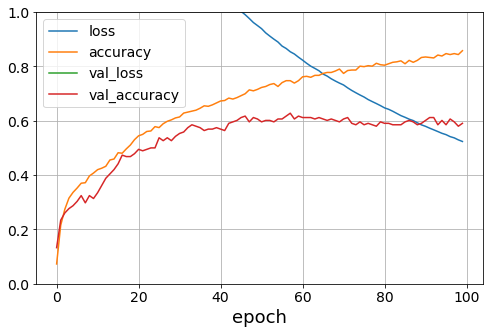

In [22]:
mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [31]:
# model_path = "./models/musicgenre_nn_classifier_v1.h5"
# model.save(model_path)
# model = keras.models.load_model(model_path)
model.predict(X)

array([[7.77258798e-02, 4.84767035e-02, 1.19989716e-01, ...,
        3.31462100e-02, 4.57172915e-02, 2.26929024e-01],
       [1.99620739e-01, 1.19231148e-02, 2.89957635e-02, ...,
        7.82633666e-03, 9.31608677e-02, 1.76279381e-01],
       [4.08248037e-01, 3.38145555e-03, 2.72053272e-01, ...,
        5.24243228e-02, 1.27489576e-02, 2.03344017e-01],
       ...,
       [1.97777580e-02, 3.51431445e-05, 3.26157920e-02, ...,
        3.66544991e-05, 2.13286621e-04, 8.49649131e-01],
       [1.01545058e-01, 7.40389060e-03, 2.46231332e-01, ...,
        3.16512473e-02, 7.19827265e-02, 4.71968353e-01],
       [4.85825539e-02, 1.07151400e-02, 2.25675687e-01, ...,
        7.91723467e-03, 1.41044026e-02, 5.30412078e-01]], dtype=float32)

Class 0: blues
Class 1: classical
Class 2: country
Class 3: disco
Class 4: hiphop
Class 5: jazz
Class 6: metal
Class 7: pop
Class 8: reggae
Class 9: rock


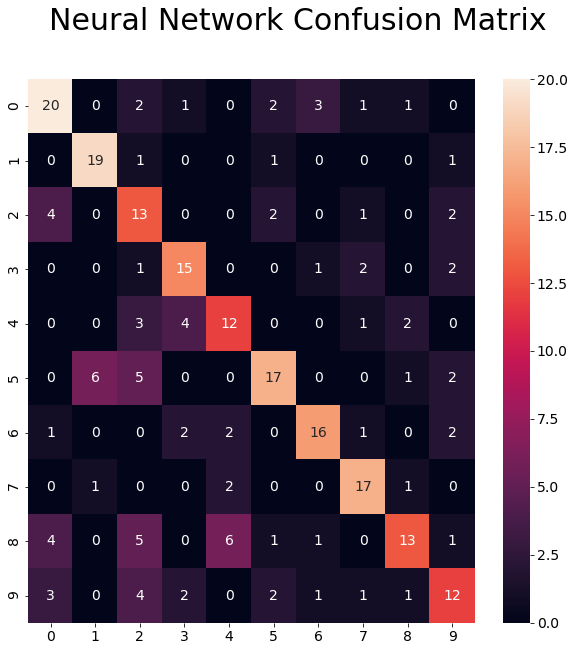

In [47]:
from sklearn.metrics import confusion_matrix
from ml_toolbox import show_confusion_matrix

y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

show_confusion_matrix(y_test, y_pred_nn, encoder, "Neural Network Confusion Matrix")